# Geometric data manipulations

In this section we will use the Helsinki Region Travel Time Matrix data that constist of 13231 statistical grid squares (250m x 250m) to demonstrate some of the most common geometry manipulation functions available in geopandas. 

As the geometries in GeoDataFrames are eventually Shapely objects, we can use all of Shapely's tools for geometry manipulation directly via geopandas.


In [1]:
import geopandas as gpd
from pathlib import Path

input_folder = Path("../data/Helsinki")
fp = input_folder / "TravelTimes_to_5975375_RailwayStation.shp"

data = gpd.read_file(fp)

data.geometry.head()

0    POLYGON ((382000.000 6697750.000, 381750.000 6...
1    POLYGON ((382250.000 6697750.000, 382000.000 6...
2    POLYGON ((382500.000 6697750.000, 382250.000 6...
3    POLYGON ((382750.000 6697750.000, 382500.000 6...
4    POLYGON ((381250.000 6697500.000, 381000.000 6...
Name: geometry, dtype: geometry

In [11]:
# Plot grid geometry

## Centroid

Extracting the centroid of geometric features is useful in a multitude of use cases. For example, the values in the Travel Time Matrix data set have originally been calculated from the center point of each grid square. We can find out the geometric centroid of each grid square in geopandas via the centroid-attribute:

In [2]:
# Polygon centroids
data.centroid

0        POINT (381875.000 6697875.000)
1        POINT (382125.000 6697875.000)
2        POINT (382375.000 6697875.000)
3        POINT (382625.000 6697875.000)
4        POINT (381125.000 6697625.000)
                      ...              
13226    POINT (372875.000 6665625.000)
13227    POINT (373125.000 6665625.000)
13228    POINT (372375.000 6665375.000)
13229    POINT (372625.000 6665375.000)
13230    POINT (372875.000 6665375.000)
Length: 13231, dtype: geometry

In [3]:
# plot centroid geometries

## Unary union

Extracting only the outlines of the set of grid squares is possible through creating a geometric union among all geometries in the GeoDataFrame/GeoSeries. This could be useful, for example, when delineating the outlines of a study area.

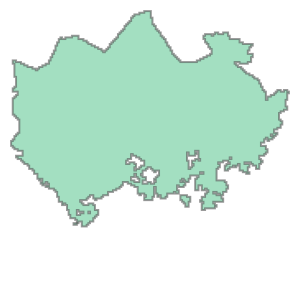

In [4]:
# Polygon centroids
data.unary_union

Note that the previous operation is identical to calling `data['geometry'].unary_union`.

## Data extent

Sometimes it is enough to describe the approximate extent of the data using a bounding polygon.

### Bounding box

A minimum bounding rectangle, i.e. a bounding box or an envelope is the smallest rectangular polygon surrounding a geometric object. In a GeoDataFrame, the `envelope` attribute returns the bounding rectangle for each geometry:

In [5]:
data.envelope

0        POLYGON ((381750.000 6697750.000, 382000.000 6...
1        POLYGON ((382000.000 6697750.000, 382250.000 6...
2        POLYGON ((382250.000 6697750.000, 382500.000 6...
3        POLYGON ((382500.000 6697750.000, 382750.000 6...
4        POLYGON ((381000.000 6697500.000, 381250.000 6...
                               ...                        
13226    POLYGON ((372750.000 6665500.000, 373000.000 6...
13227    POLYGON ((373000.000 6665500.000, 373250.000 6...
13228    POLYGON ((372250.000 6665250.000, 372500.000 6...
13229    POLYGON ((372500.000 6665250.000, 372750.000 6...
13230    POLYGON ((372750.000 6665250.000, 373000.000 6...
Length: 13231, dtype: geometry

In order to get the bounding rectangle for the whole layer, we can first create an union of all geometries, and then create the bounding rectangle for those:

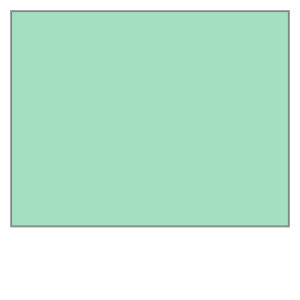

In [6]:
data.unary_union.envelope

Corner coordinates of a GeoDataFrame can be directly fetched via the `total_bounds`attribute, while the `bounds` attribute returns the bounding coordinates of each feature:

In [7]:
data.total_bounds

array([ 361500.00014042, 6665250.00004393,  403750.00013197,
       6698000.00003802])

In [8]:
data.bounds.head()

,minx,miny,maxx,maxy
0,381750.000136,6.697750e+06,382000.000136,6.698000e+06
1,382000.000136,6.697750e+06,382250.000136,6.698000e+06
2,382250.000136,6.697750e+06,382500.000136,6.698000e+06
3,382500.000136,6.697750e+06,382750.000136,6.698000e+06
4,381000.000136,6.697500e+06,381250.000136,6.697750e+06


### Convex hull

A bit more detailed delineation of the data extent can be extracted using a convex hull which represents the smalles possible polygon that contains all points in an object. 

In order to create a covex hull for all grid squares, in stead of individual grid squares, we need to first create an union of all polygons: 

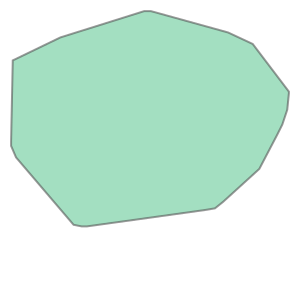

In [9]:
data.unary_union.convex_hull

## Buffer

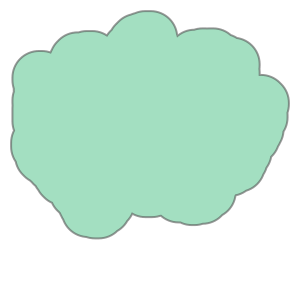

In [10]:
# 5 km buffer for the travel time matrix extent
data.unary_union.buffer(5000)



## Dissolving and merging geometries

Data aggregation refers to a process where we combine data into groups. When doing spatial data aggregation, we merge the geometries together into coarser units (based on some attribute), and can also calculate summary statistics for these combined geometries from the original, more detailed values. For example, suppose that we are interested in studying continents, but we only have country-level data like the country dataset. If we aggregate the data by continent, we would convert the country-level data into a continent-level dataset.

In this section, we will aggregate our travel time data by car travel times (column `car_r_t`), i.e. the grid cells that have the same travel time to Railway Station will be merged together.

- For doing the aggregation we will use a function called `dissolve()` that takes as input the column that will be used for conducting the aggregation:


In [ ]:
# Conduct the aggregation
dissolved = intersection.dissolve(by="car_r_t")

# What did we get
dissolved.head()

- Let's compare the number of cells in the layers before and after the aggregation:

In [ ]:
print("Rows in original intersection GeoDataFrame:", len(intersection))
print("Rows in dissolved layer:", len(dissolved))

Indeed the number of rows in our data has decreased and the Polygons were merged together.

What actually happened here? Let's take a closer look. 

- Let's see what columns we have now in our GeoDataFrame:

In [ ]:
dissolved.columns

As we can see, the column that we used for conducting the aggregation (`car_r_t`) can not be found from the columns list anymore. What happened to it?

- Let's take a look at the indices of our GeoDataFrame:

In [ ]:
dissolved.index

Aha! Well now we understand where our column went. It is now used as index in our `dissolved` GeoDataFrame. 

- Now, we can for example select only such geometries from the layer that are for example exactly 15 minutes away from the Helsinki Railway Station:

In [ ]:
# Select only geometries that are within 15 minutes away
dissolved.loc[15]

In [ ]:
# See the data type
type(dissolved.loc[15])

In [ ]:
# See the data
dissolved.loc[15].head()

As we can see, as a result, we have now a Pandas `Series` object containing basically one row from our original aggregated GeoDataFrame.

Let's also visualize those 15 minute grid cells.

- First, we need to convert the selected row back to a GeoDataFrame:

In [ ]:
# Create a GeoDataFrame
selection = gpd.GeoDataFrame([dissolved.loc[15]], crs=dissolved.crs)

- Plot the selection on top of the entire grid:

In [ ]:
# Plot all the grid cells, and the grid cells that are 15 minutes a way from the Railway Station
ax = dissolved.plot(facecolor="gray")
selection.plot(ax=ax, facecolor="red")

## Simplifying geometries

In [ ]:
data.unary_union.simplify(tolerance=500)

## Simplifying geometries

Sometimes it might be useful to be able to simplify geometries. This could be something to consider for example when you have very detailed spatial features that cover the whole world. If you make a map that covers the whole world, it is unnecessary to have really detailed geometries because it is simply impossible to see those small details from your map. Furthermore, it takes a long time to actually render a large quantity of features into a map. Here, we will see how it is possible to simplify geometric features in Python.

As an example we will use data representing the Amazon river in South America, and simplify it's geometries.

- Let's first read the data and see how the river looks like:

In [ ]:
import geopandas as gpd

# File path
fp = "data/Amazon_river.shp"
data = gpd.read_file(fp)

# Print crs
print(data.crs)

# Plot the river
data.plot()

The LineString that is presented here is quite detailed, so let's see how we can generalize them a bit. As we can see from the coordinate reference system, the data is projected in a metric system using [Mercator projection based on SIRGAS datum](http://spatialreference.org/ref/sr-org/7868/). 

- Generalization can be done easily by using a Shapely function called `.simplify()`. The `tolerance` parameter can be used to adjusts how much geometries should be generalized. **The tolerance value is tied to the coordinate system of the geometries**. Hence, the value we pass here is 20 000 **meters** (20 kilometers).

In [ ]:
# Generalize geometry
data["geom_gen"] = data.simplify(tolerance=20000)

# Set geometry to be our new simlified geometry
data = data.set_geometry("geom_gen")

# Plot
data.plot()

Nice! As a result, now we have simplified our LineString quite significantly as we can see from the map.


